# Implement Vanilla Gradient Descent on MSE loss




### PROLOGUE: 
Gradient Descent is where the magic happens and this optimization algorithm is used in  many ML/DL algorithms such as Linear Regression, Logistic Regression , SVM & Neural Networks.We seldom have to implement this algorithm oursleves because the libraries implement it under the hood.

Inspite of being a fundamental concept in ML , this has always been a daunting concept , especially for beginners. Theortically  it involves  Calculus and Vector Algebra but how does it all pan out in terms of code ? Implementing the  Gradient Descent algorithm helps one understand this algorithm at a granular level.



### PROJECT OBJECTIVE: 
To implement Gradient Decsent on MSE Loss function from a neural network perspective


### CODE/SOLUTION SUMMARY
We will be finding the best fit line on the given data set using Gradient Decsent i.e we will be implementing gradient decsent on the MSE loss function.Below is the step wise breakdown of the code
- We will begin by manually creating a 2D data set & visualize the data set
- Note here that at this point , we already know what the best fit line for this data looks like.
- We will then implement Gradient Descent & see whether we can arrive at this best fit line through the gradient Descent algorithm
- We start at random point and and iteratvely keep reducing the loss until we arrive at the best fit line
- Cross vaidate whether the "best fit" line we arrived at through gradient decsnt is indeed the best fit line.
- We will realize all the operations in matrix format because we are implemting this from a neural network perspective 

In [ ]:
# Import  libraries

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import statistics as stats
sns.set(color_codes=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#Last import allows multiple outputs from one cell
import warnings
# Initialize the random number generator
import random
random.seed(0)

In [ ]:
# Useful Configuration/Setting

# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

#Setting to shows all entries in array displayed
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
# Lets create a  2 D data set manually

X=np.arange(2,20,2)
Y=2*X + 3

In [ ]:
X

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])

In [ ]:
Y

array([ 7, 11, 15, 19, 23, 27, 31, 35, 39])

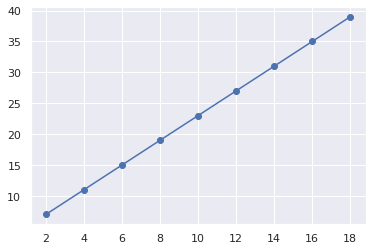

In [ ]:
# Lets visualize the Actual Data Set

plt.scatter(x=X,y=Y)
plt.plot(X,Y,c='b')
plt.show()

In [ ]:
# Cool , so we now know that the best fit line is y=2x+3 , because we created it 
# We could think of this as a toy data set because in reality we never data points that actually fall on one line .
# However , for the objective of this notebook , its convenient.
# We have plotted both the points and the line above 
# Lets see if gradient descent can arrive at the same line 

In [ ]:
# Note :
# Variables naming convention
# We have used small letters for scalars and CAPS for Vectors

In [ ]:
# Lets define our loss function 

def MSE(Y_True,Y_Pred):
  loss=np.sum(np.square(Y_Pred-Y_True))/Y_True.shape[0]
  return loss


In [ ]:
# Lets define our linear function
def linearFunc(X,W):
  Y=W[0]*X +  W[1]
  return Y


In [ ]:
# Start at a random weight
W=np.ones(shape=2)
W[0]=np.random.randint(5,10)
W[1]=np.random.randint(5,10)

In [ ]:
print(W[0])
print(W[1])

5.0
6.0


In [ ]:
# Now we have some random weights , lets visualize what the predicted line ...
# ... looks like with these weights agianst the actual line

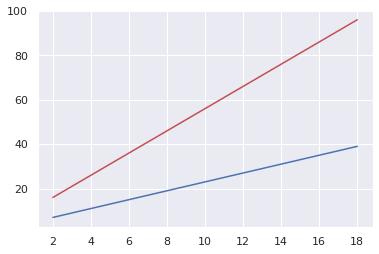

In [ ]:
# Lets see what the line looks like at this point
plt.plot(X,linearFunc(X,W),c='r')# predicted line in red
plt.plot(X,Y,c='b')# actual line in blue

In [ ]:
# We can see the predicted line and actual line in the above

##  Calculate Derivatives

- We would need to calculate the partial derviatives of 'm' and c(y=mx+c) which we will use later in our code
- The Derivates are calculated as below
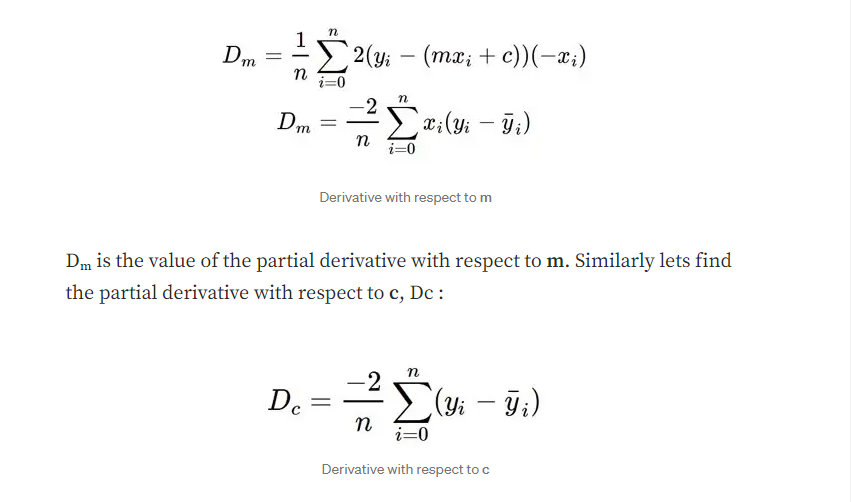

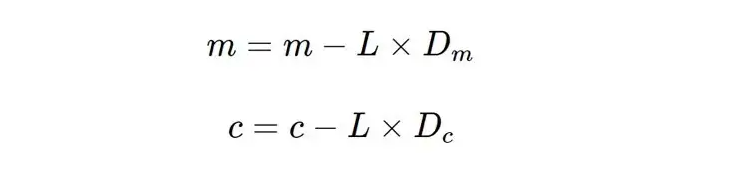

- Calculation of Derivatives above  referenced from https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931 

- In the above excerpt , we have seen how we calculate derivative  of each variable in the function seperately as these are partial derivatives
- Now , take note that, we can represent the above in the form of a vector, this is merely a representation which will allow us to make computations easier for Neural Networks.
- How is this applicable to Neuarl Networks ? Each node in a neural network is a linear function.
- Since this a muti dimensional function , the derivative of such functions can be represented as a vector(where partial derivative of each variable will be one element), this is usually represented as a column vector in theory.
- In our code , we will represent this as vector named grad which will basically comprise of 2 elements in this case
- So Dc and Dm calculated above will be each element of that vector

In [ ]:
# Lets write a func to calculate these gradients
'''Make note that we will be calcuating gradient at different points on the loss function as we try to make ...
our way to the minima for every combination of weighst(m & c) that we are at.
Therefore the gradient function will take inputs as X(Input data points), Y(Actual Values), P(Predicted Values) and give us 
the corresponding gradients of 'm' and 'c' at that point '''

def grad(X,Y,P):
  '''Note here that we are going to realise this operation of calcuating gradient as one singly operation ...
  insetad of doing seperately for m anc c. The final gradient will be a vector where one element corresponds to m ...
  and one to c . So we will use the formula summation xi(y-yi) to calcuate both derivatives .Note only one of them had x into...
  so just to make up for that we will add a dummy layer of 1's in the x part of that deriative which does not have x multiplied ...
  with y-yi which for derivative of c because we canot do a multiplication op otherwise'''
  
  # add  a dummy layer of 1 's 
  X1=np.vstack((np.ones_like(X),X))

  #calculate term in derivative which we will need later
  E=P-Y

  #calculate number of samples 
  N=np.shape(X)[0]

  #Calculate gradient 
  G=-1/N*(X.dot(E))

  return G

##  Implement Gradient Descent for 1 iteration

In [ ]:
# We have already assigned an arbitrary value for weights (aka m and c here)
print('W',W)

#Lets also re-print our X,Y
print('X',X) # input values
print('Y',Y) # Actual Output

#Alrighty, we are all set to proceed

W [5. 6.]
X [ 2  4  6  8 10 12 14 16 18]
Y [ 7 11 15 19 23 27 31 35 39]


In [ ]:
# Lets use LR as 0.0001
lr=0.001

# Lets do one iteration and of GD and view results

P=linearFunc(X,W)     #Prediction with current weights
gradient=grad(X,Y,P)  #Calculate the gradient at this point

#Lets update the weights 
W1=W + lr*gradient

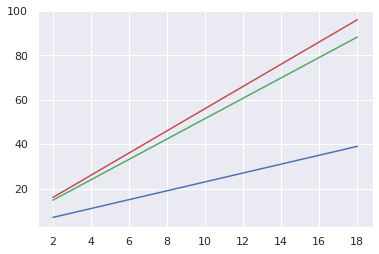

In [ ]:
# Now lets plot orginal line , random line & line after first iteration in one graph

# Lets see what the line looks like at this point
plt.plot(X,linearFunc(X,W),c='r')# starting line in red
plt.plot(X,linearFunc(X,W1),c='g')#  line after one iteration in green
plt.plot(X,Y,c='b')# actual line in blue

# Neat , we can see it took a tiny step towards the best fit line , lets proceed

##  Implement Gradient Descent in its entirity

In [ ]:
# We have already assigned an arbitrary value for weights (aka m and c here)
print('W',W)

#Lets also re-print our X,Y
print('X',X) # input values
print('Y',Y) # Actual Output

#Alrighty, we are all set to proceed

W [5. 6.]
X [ 2  4  6  8 10 12 14 16 18]
Y [ 7 11 15 19 23 27 31 35 39]


currLoss 990.5627666666666
deltaLoss 338.43723333333344


currLoss 738.3104550085186
deltaLoss 252.25231165814796


currLoss 550.2955959158493
deltaLoss 188.01485909266933


currLoss 410.1597652181233
deltaLoss 140.13583069772596


currLoss 305.71030233996584
deltaLoss 104.44946287815748


currLoss 227.85947545852494
deltaLoss 77.8508268814409


currLoss 169.83379414703683
deltaLoss 58.025681311488114


currLoss 126.5846749464153
deltaLoss 43.24911920062152


currLoss 94.34918422311651
deltaLoss 32.235490723298796


currLoss 70.32264029856526
deltaLoss 24.026543924551248


currLoss 52.41458926520066
deltaLoss 17.9080510333646


currLoss 39.06692291665471
deltaLoss 13.34766634854595


currLoss 29.118313957467915
deltaLoss 9.948608959186796


currLoss 21.703173539787844
deltaLoss 7.415140417680071


currLoss 16.176339824694523
deltaLoss 5.526833715093321


currLoss 12.056945019781509
deltaLoss 4.119394804913014


currLoss 8.98657698746625
deltaLoss 3.0703680323152582


currLoss 6.698095232180254
deltaLoss 2.2884817552859964


currLoss 4.992388069665357
deltaLoss 1.705707162514897


currLoss 3.721048712235787
deltaLoss 1.2713393574295702


currLoss 2.7734629851721135
deltaLoss 0.9475857270636734


currLoss 2.0671852278703264
deltaLoss 0.7062777573017871


currLoss 1.5407650252307699
deltaLoss 0.5264202026395566


currLoss 1.148400651750059
deltaLoss 0.39236437348071096


currLoss 0.8559540457782896
deltaLoss 0.2924466059717693


currLoss 0.6379805927205877
deltaLoss 0.21797345305770188


currLoss 0.4755152904476669
deltaLoss 0.16246530227292083


currLoss 0.3544226799835541
deltaLoss 0.1210926104641128


currLoss 0.264166975510854
deltaLoss 0.0902557044727001


currLoss 0.19689538760270983
deltaLoss 0.06727158790814416


currLoss 0.14675488328641706
deltaLoss 0.05014050431629277


currLoss 0.10938293695262312
deltaLoss 0.03737194633379394


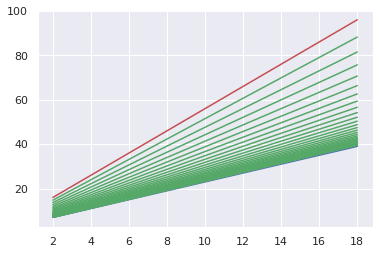

In [ ]:
# Lets use LR as 0.0001
lr=0.001
totalIterCount=100 # Total no of iterations allowed
itercount=0 #Current iteration number
lossThresh=0.05
deltaLoss=5  # Intially we set an arbitrary value greater than lossThresh
P=linearFunc(X,W)
initLoss=MSE(Y,P) # This is loss with current weights

# Lets plot the actual line and initial line 
plt.plot(X,linearFunc(X,W),c='r')# starting line in red
plt.plot(X,Y,c='b')# actual line in blue


# We will now do multiple iterations
# Stopping condition ? Either max iterations are reached or the loss is not reducing beyond a fixed threshold

while(True):
  if(itercount>=200):
    break
  if(deltaLoss <= lossThresh):
    break
  else:
    W=W + lr*gradient
    P=linearFunc(X,W)     #Prediction with current weights
    gradient=grad(X,Y,P)  #Calculate the gradient at this point
    currLoss=MSE(Y,P)     #Lets update the weights 
    print('currLoss',currLoss)
    deltaLoss=initLoss-currLoss  # Calculate diff in loss
    print('deltaLoss',deltaLoss)
    initLoss=currLoss
    itercount=itercount+1
    plt.plot(X,linearFunc(X,W),c='g')#  line after one iteration in green



##  Result
- As can be seen in the graph above , the gradient descent algorithm was able to reach the best fit line through an iterative process
- Each green line indicates one iteration
- Vanilla Gradient descent took 32 iterations to reach the best fit line i.e minima of the loss curve
- In future notebooks we can exploer how adding momentum to gradient descent can help with faster convergence 

In [ ]:
currLoss

0.10938293695262312

In [ ]:
deltaLoss

0.03737194633379394

In [ ]:
itercount

32

In [ ]:
W

array([2.02721658, 3.02721658])

##  References
- The following references were used while creating this notebook:

- https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931 by Adarsh Menon

- Post Graduation AI/ML Study Material by GL/UAT
